In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [3]:
cols = df.columns
cols = cols.to_list()
print(cols)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [4]:
df.drop(columns=['Serial No.'], inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

In [7]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [8]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.24      , 0.35714286, 0.        , 0.25      , 0.125     ,
        0.38461538, 0.        ],
       [0.98      , 0.78571429, 1.        , 0.75      , 0.875     ,
        0.94871795, 1.        ],
       [0.52      , 0.60714286, 0.5       , 0.625     , 0.5       ,
        0.62820513, 0.        ],
       [0.26      , 0.25      , 0.5       , 0.25      , 0.375     ,
        0.27564103, 0.        ],
       [0.42      , 0.42857143, 0.25      , 0.375     , 0.625     ,
        0.53846154, 0.        ],
       [0.44      , 0.46428571, 0.25      , 0.25      , 0.375     ,
        0.52884615, 0.        ],
       [0.62      , 0.35714286, 0.5       , 0.625     , 0.75      ,
        0.70833333, 1.        ],
       [0.36      , 0.57142857, 0.75      , 0.875     , 1.        ,
        0.49358974, 0.        ],
       [0.28      , 0.32142857, 0.25      , 0.25      , 0.375     ,
        0.27564103, 0.        ],
       [0.44      , 0.5       , 0.5       , 0.5       , 1.        ,
        0.56730769, 0. 

In [12]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential()

## Hidden layer 1
model.add(Dense(7, activation='relu', input_dim=7))

## Hidden layer 2
model.add(Dense(7, activation='relu', input_dim=7))

## Output layer
model.add(Dense(1, activation='linear'))

c:\Users\7200\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [20]:
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0313 - val_loss: 0.0408
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - val_loss: 0.0349
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0304 - val_loss: 0.0370
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - val_loss: 0.0430
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0268 - val_loss: 0.0466
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0334 - val_loss: 0.0460
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0321 - val_loss: 0.0375
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0285 - val_loss: 0.0325
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0280 - val_loss: 0.0329
Epoch 10/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0224 - val_loss: 0.0308
Epoch 11/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0216 - val_loss: 0.0329
Epoch 12/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

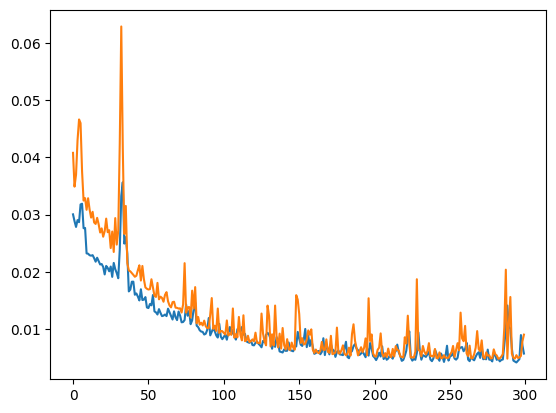

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Check r2 score

In [23]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4480594119572917